### Quick tutorial on lambda functions

- lambda is a keyword in Python
- it is a short-hand substitute for a function
- useful for:
    - one-off function you'll never use again in the program
    - passing a function as an argument to another function
    

- syntax:
    - lambda arguments: expression

In [3]:
# function
def double_fun(x):
    return x * 2

In [4]:
# lambda
double = lambda x: x * 2

In [5]:
double_fun(3)

6

In [6]:
double(3)

6

Both give the same value as they perform the same operations. The lambda function is only one line though and can be assigned to a variable, here "double".

## Analayzing hospital data for patient no-shows with Machine Learning

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [8]:
df = pd.read_csv('no_show_patient_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 1. Clean the data

In [9]:
## PatientId and AppointmentID unnecessary so we can drop them
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [10]:
df['ScheduledDay'].dtype, df['AppointmentDay'].dtype

(dtype('O'), dtype('O'))

We see the data types of the date columns are both object
Want to convert these to datetime objects to make it easier to work with later

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Replace the yes and no with 1 and 0, respectively, so we can do analysis more easily later.

In [13]:
df['No-show'] = df['No-show'].apply(lambda x: x == 'Yes' and 1 or 0)

Above is a use of the lambda function which we went through in the beginning.

The lambda function:
- Takes an argument x
- Checks whether x equals "Yes"
- Then the rest of the function executes (and 1 or 0)
- If x equals "Yes" then it returns True, then the function becomes (True and 1 or 0)
    - True and 1 --> gives you 1
    - False and 1 --> returns False, so the or executes which gives you 0

In [14]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We see no null values so we don't have to be concerned with fixing any missing values

Convert the appointment and scheduled days to integers for analysis. Will correspond to integers 0-6 (0 = Monday, 6 = Sunday).

In [15]:
df['AppointmentDay'] = df['AppointmentDay'].dt.weekday
df['ScheduledDay'] = df['ScheduledDay'].dt.weekday

In [16]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,4,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,4,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,4,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,4,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,4,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0


After a quick glance at the data, all the columns looked reasonably formatted.

### Step 2. Visualizing the data

In [17]:
df.shape

(110527, 12)

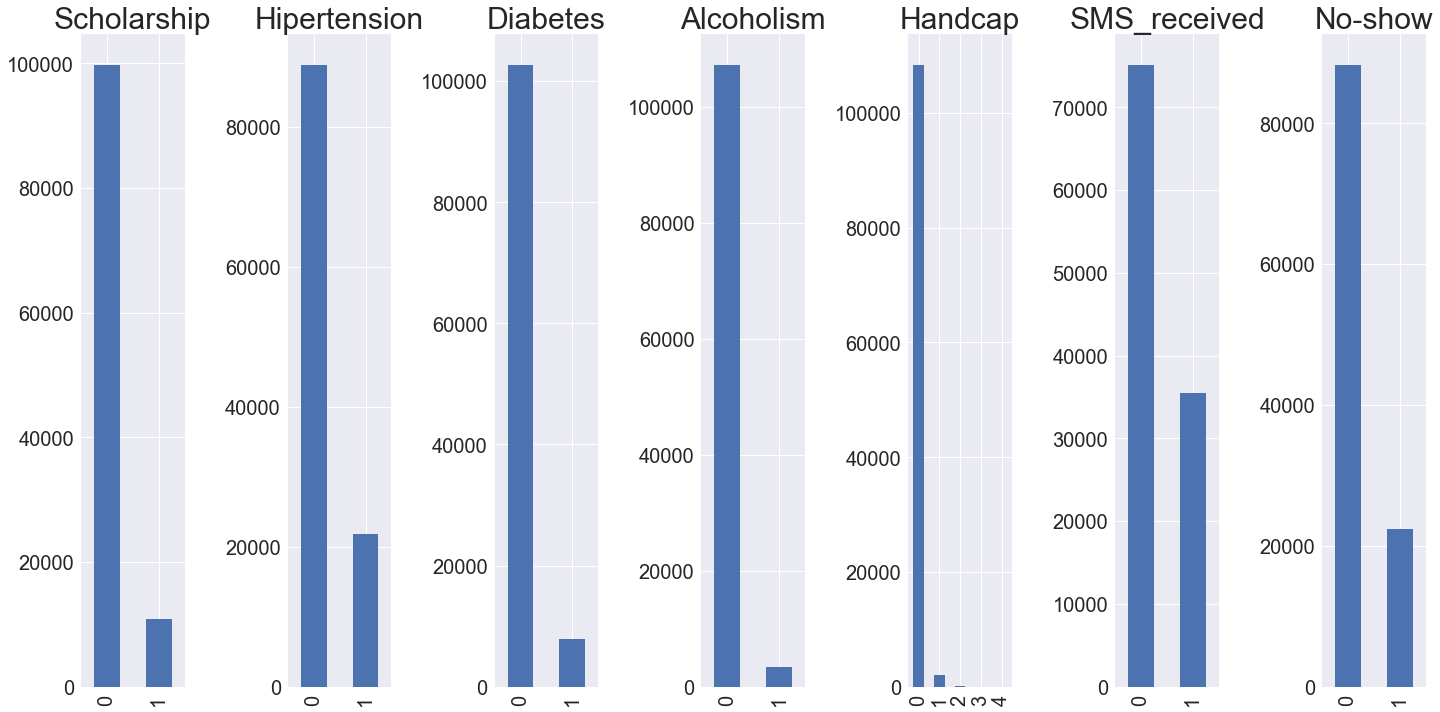

In [63]:
categorical_cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
fig, ax = plt.subplots(ncols=7, figsize=(20, 10))

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', subplots=True, ax=ax[i])
    ax[i].set_title(col,fontsize= 30)
    ax[i].tick_params(labelsize=20)
    
plt.tight_layout()

In [24]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Four different types for value counts, but data description doesn't provide information on what each means. 
We can make inferences that 0 corresponds to no handicap, since it has the highest number, while each increasing number represents a higher degree of being handicapped.

#### Gender Analysis

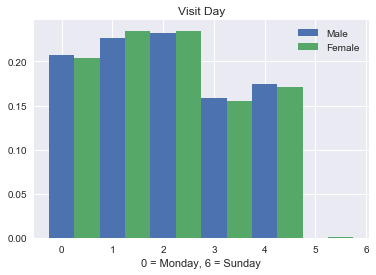

In [339]:
df_males = df[df['Gender'] == 'M']['AppointmentDay'].value_counts().sort_index()
df_females = df[df['Gender'] == 'F']['AppointmentDay'].value_counts().sort_index()

plt.bar(range(6), df_males/sum(df_males), width = 0.5, label='Male')
plt.bar(range(6) + 0.5*np.ones(len(range(6))), df_females/sum(df_females), width = 0.5, label='Female')
plt.title('Visit Day')
plt.xlabel('0 = Monday, 6 = Sunday')
plt.legend()

### Show-up Ratio by Age

In [378]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [363]:
shows = df[df['No-show'] == 1]['Age'].value_counts().sort_index()
no_shows = df[df['No-show'] == 0]['Age'].value_counts().sort_index()

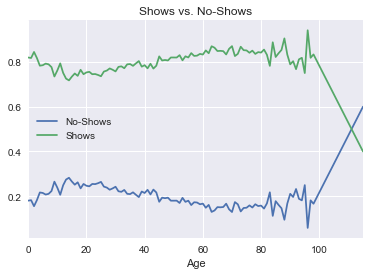

In [376]:
(shows /(shows + no_shows)).dropna().plot(title='Shows vs. No-Shows', label='No-Shows')
(no_shows /(shows + no_shows)).dropna().plot(label='Shows')
plt.xlabel('Age')
plt.legend()

## Visuals of Different Relationships

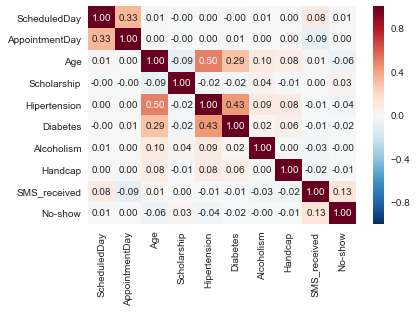

In [71]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

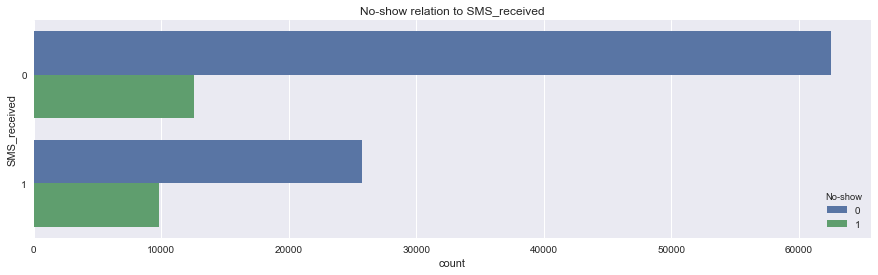

In [72]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="SMS_received", hue='No-show', data=df).set_title('No-show relation to SMS_received');

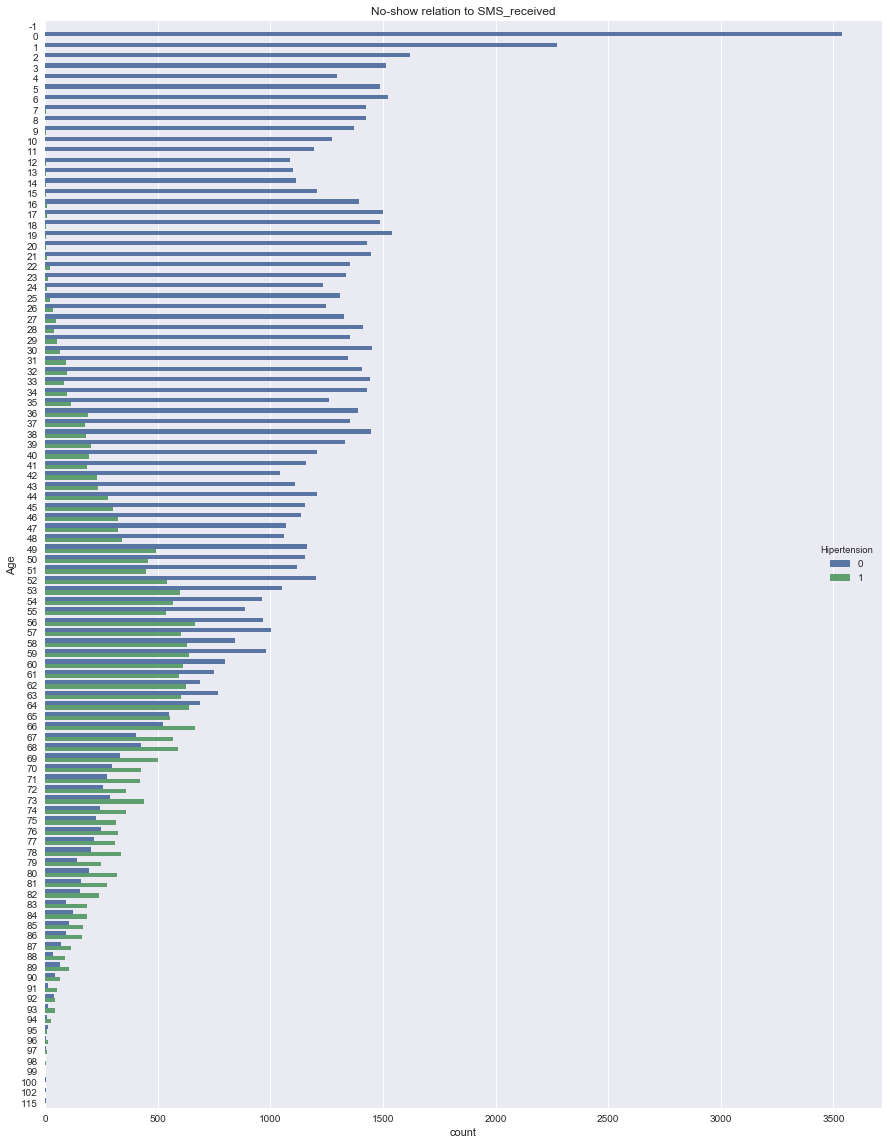

In [73]:
f, ax = plt.subplots(figsize=(15, 20))
sns.countplot(y="Age", hue='Hipertension', data=df).set_title('No-show relation to SMS_received');

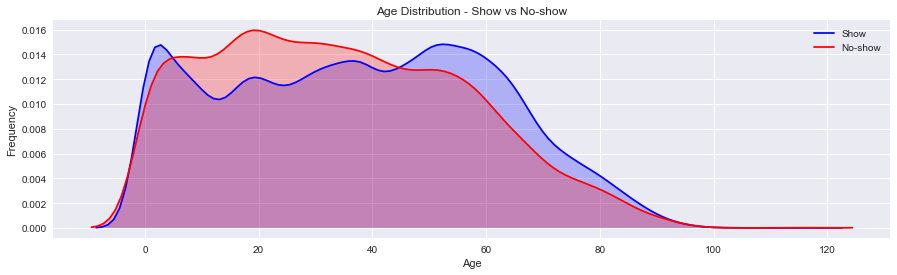

In [76]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['No-show'] == 0),'Age'] , color='b',shade=True,label='Show')
ax=sns.kdeplot(df.loc[(df['No-show'] == 1),'Age'] , color='r',shade=True, label='No-show')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age Distribution - Show vs No-show')

### Simple ML Algo K-Means

##### (Not applicable to do this data type but shows how simple it is to use)

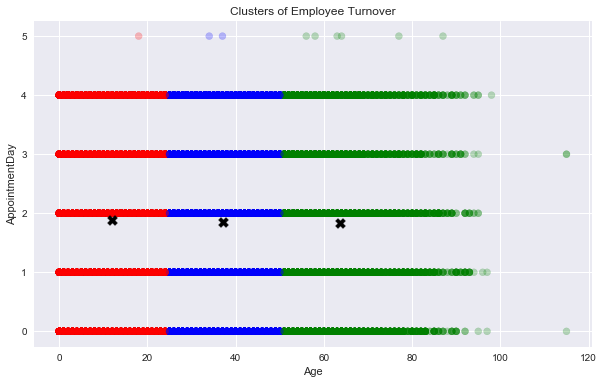

In [77]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
# random_state = seed
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df['No-show']==1][["Age","AppointmentDay"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Age",y="AppointmentDay", data=df[df['No-show']==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Age")
plt.ylabel("AppointmentDay")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

## Linear Regression Example

First step is to preprocess our data. To do so we want to:
- (1) normalize our data, i.e. subtract the mean and divide by the standard deviation
    - $x' = \frac{x -\bar{x}}{\sigma }$
    - transforms the dataset to have 0 mean and unit standard deviation
- (2) split our data into train and test sets (usual split is 70-30)

In [168]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [379]:
df_X = df['Age']
df_Y = df['No-show']

df_X_train = [[x] for x in df_X[:5000].values]
df_X_test  = [[x] for x in df_X[5000:6000].values]

df_Y_train = [[y] for y in df_Y[:5000].values]
df_Y_test  = [[y] for y in df_Y[5000:6000].values]

In [380]:
regr = linear_model.LinearRegression()
regr.fit(df_X_train, df_Y_train)

y_pred = regr.predict(df_X_test)

In [381]:
# The coefficients
print('Coefficient: ', regr.coef_[0][0])
# The mean squared error
print("Mean-squared error: %.2f"
      % mean_squared_error(df_Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_Y_test, y_pred))

Coefficient:  -0.00182152002343
Mean-squared error: 0.18
Variance score: -0.00


- The coefficient is the beta (m) in our best-fit line: y = mx + b
- The mean-squared error is the mean of the sum of the predicted y's minus the acutal y's squared:

$$\frac{\sum (y\prime - y)^2}{n}$$

- Variance score best value is 1, worst is 0. Calculated as:

$$explained_variance(y\prime, y) = 1 - \frac{Var(y\prime - y)}{Var(y)}$$

Based on the values calculated, our linear regression is not a good predictor.

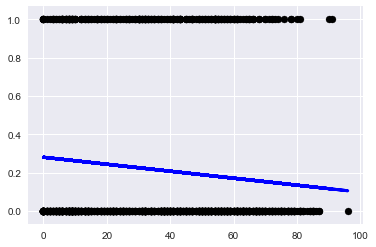

In [394]:
# Plot outputs
plt.scatter(df_X_test, df_Y_test,  color='black')
plt.plot(df_X_test, y_pred, color='blue', linewidth=3)

plt.show()

### Logistic Regression

In [401]:
logreg = linear_model.LogisticRegression(C=1e5)

In [412]:
df_X = df[['Age', 'SMS_received']] 
df_Y = df['No-show']

df_X_train = np.asarray([list(x) for x in df_X[:50000].values])
df_X_test  = np.asarray([list(x) for x in df_X[50000:70000].values])

df_Y_train = df_Y[:50000].values
df_Y_test  = df_Y[50000:70000].values

In [413]:
logreg.fit(df_X_train, df_Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [414]:
df_Y_pred = logreg.predict(df_X_test)
len(df_Y_pred)

20000

In [415]:
pd.Series(df_Y_pred).value_counts()

0    20000
dtype: int64

In [422]:
np.bincount(df_Y_train)

array([39709, 10291], dtype=int64)

In [424]:
pd.Series(df_Y_train).value_counts()

0    39709
1    10291
dtype: int64

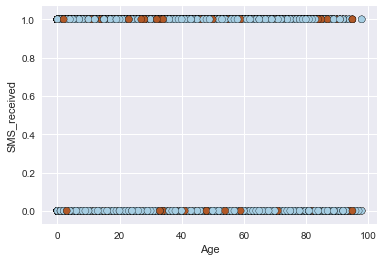

In [434]:
# Plot also the training points
plt.scatter(df_X_train[:, 0], df_X_train[:, 1], c=df_Y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('SMS_received')

plt.show()